In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas_datareader import wb
import pandas_datareader as pdr
from datetime import datetime

In [3]:
import statwrap
%use_sheets

# Nutritional Info

In [4]:
df = pd.read_csv("../Data/Nutrition/nutritional_info.csv")

# drop almonds
#df = df.query("Food Item != 'Almonds'")
df = df[df['Food Item'] != 'Almonds']

# predict cal from protein 
line, summary = linest(df['Calories (per 100g)'], df['Protein (g per 100g)'], verbose = True)
#line, summary = linest(df['Protein (g per 100g)'], df['Calories (per 100g)'], verbose = True)

line

/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


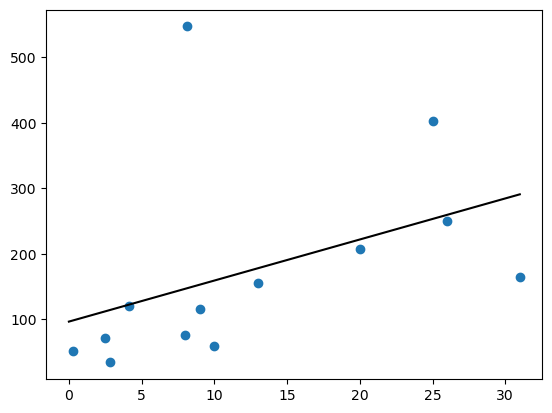

In [5]:
plt.scatter(df['Protein (g per 100g)'], df['Calories (per 100g)'])
plt.plot([0, 31], [line(0), line(31)], color = 'black')# [2, line(31)])

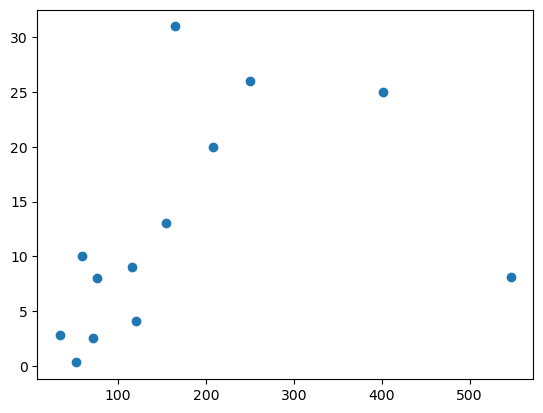

In [6]:
plt.scatter(df['Calories (per 100g)'], df['Protein (g per 100g)'] )

# GDP and Lights

In [7]:
# Lights data

dfl = pd.read_csv("../Data/GdpAndLights/Harmo_zonalstat_1992_2018.csv")

In [8]:
dfl['diff'] = dfl['Y2018_mean'] - dfl['Y1993_mean']
dfl['growth'] = dfl['diff']/dfl['Y1993_mean']

#dfl['growth'] = ((dfl['Y2014_mean']/dfl['Y2003_mean']) ** (1/(2014-2003))) - 1

dfl.head()

,OBJECTID,CNTRY_NAME,_mean,Y1993_mean,Y1994_mean,Y1995_mean,Y1996_mean,Y1997_mean,Y1998_mean,Y1999_mean,...,Y2011_mean,Y2012_mean,Y2013_mean,Y2014_mean,Y2015_mean,Y2016_mean,Y2017_mean,Y2018_mean,diff,growth
0,1,Aruba,30.646091,30.679012,30.061728,33.962963,32.477366,35.995885,39.753086,38.407407,...,35.705882,37.283951,36.732510,29.790123,30.226337,31.835391,36.699588,37.074074,6.395062,0.208451
1,2,Antigua and Barbuda,6.403077,8.044615,8.038462,9.280000,9.515385,10.443077,10.350769,10.987692,...,17.364048,15.769231,15.553846,16.666154,17.067692,15.700000,17.266154,17.441538,9.396923,1.168101
2,3,Afghanistan,0.027412,0.019952,0.017496,0.029280,0.029321,0.027617,0.033065,0.028123,...,0.173971,0.209232,0.190876,0.566413,0.483433,0.443360,7.020102,2.041443,2.021491,101.316422
3,4,Algeria,0.503553,0.474245,0.472789,0.544730,0.534737,0.506146,0.532425,0.531688,...,0.831458,0.915456,0.920914,1.735160,1.800834,1.787529,3.569371,2.799999,2.325754,4.904125
4,5,Azerbaijan,1.916989,2.447440,1.960497,2.332517,2.124703,1.814333,2.062260,2.297675,...,2.738552,3.558808,3.424774,6.942340,6.579300,6.324827,9.152183,7.989640,5.542200,2.264488


In [9]:
dfl[dfl.CNTRY_NAME.str.contains("States")]

,OBJECTID,CNTRY_NAME,_mean,Y1993_mean,Y1994_mean,Y1995_mean,Y1996_mean,Y1997_mean,Y1998_mean,Y1999_mean,...,Y2011_mean,Y2012_mean,Y2013_mean,Y2014_mean,Y2015_mean,Y2016_mean,Y2017_mean,Y2018_mean,diff,growth
73,74,Federated States of Micronesia,1.014901,1.925497,2.155629,3.367550,2.943709,2.642384,2.923841,2.690397,...,2.241776,2.004967,1.683775,3.233444,3.602649,3.314570,6.291391,6.448675,4.523179,2.349097
232,233,United States,3.594928,3.799162,3.773146,4.108279,4.132442,4.031217,4.184936,4.392588,...,4.413708,4.316884,4.460633,6.656070,7.927668,6.934491,7.853123,7.128842,3.329680,0.876425


# Father and Son Heights

In [10]:
df = pd.read_csv("../Data/FatherSonHeights/pearson.tsv", sep = '\t')
df.columns = ["Father's Height (inches)", "Son's Height (inches)"]

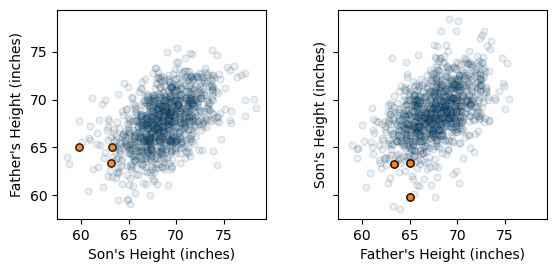

In [11]:
dad = df["Father's Height (inches)"].tail(-3)
son = df["Son's Height (inches)"].tail(-3)

dad1 = df["Father's Height (inches)"].head(3)
son1 = df["Son's Height (inches)"].head(3)


fig, axs = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (6,2.8))

ax = axs[0]
ax.set_aspect(1)
ax.scatter(son, dad, alpha = .1, ec = 'black', s = 23)
ax.scatter(son1, dad1, alpha = .9,ec = 'black', s = 28, fc = 'C1')
ax.set_ylabel("Father's Height (inches)")
ax.set_xlabel("Son's Height (inches)")

ax = axs[1]
ax.set_aspect(1)
ax.scatter(dad, son, alpha = .1, ec = 'black', s = 23)
ax.scatter(dad1, son1, alpha = 1, ec = 'black', s = 28, fc = 'C1')

ax.set_xlabel("Father's Height (inches)")
ax.set_ylabel("Son's Height (inches)")

plt.tight_layout()
#plt.savefig('../book/images/fathersonscatter.svg', transparent = True)

In [12]:
linest(son, dad)

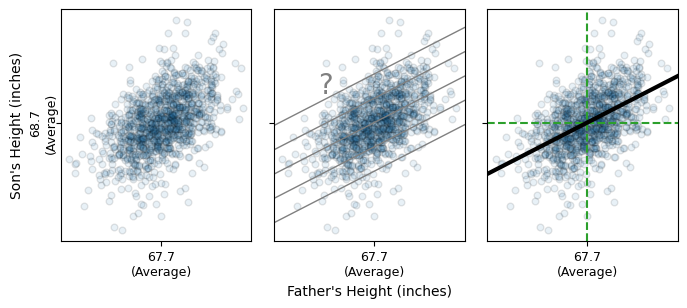

In [13]:
dad = df["Father's Height (inches)"]#.tail(-3)
son = df["Son's Height (inches)"]# .tail(-3)


fig, axs = plt.subplots(1, 3, 
                        figsize = (7,3),
                        sharex = True,
                        sharey = True) #1, 2, sharex = True, sharey = True, figsize = (6,2.8))

for i in range(3):

    ax = axs[i]
    ax.set_aspect(1)
    ax.set_xticks([np.mean(dad)])
    ax.set_yticks([np.mean(son)])
    
    ax.set_xticklabels([f'{np.mean(dad):.1f}\n(Average)'], size = 9)
    ax.set_yticklabels([f'{np.mean(son):.1f}\n(Average)\n'],
                       size = 9,
                       rotation = 90,
                       ha = 'center',
                      va = 'center')

    if i > 1:
        ax.axvline(np.mean(dad), color = 'C2', ls = 'dashed')
        ax.axhline(np.mean(son), color = 'C2', ls = 'dashed')

    ax.scatter(dad, son, alpha = .1, ec = 'black', s = 23)

    if i == 1:
        ax.set_xlabel("Father's Height (inches)")
    if i == 0:
        ax.set_ylabel("Son's Height (inches)")

    if i > 1:
        reg = linest(son,dad)
        x = ax.get_xlim()
        plt.plot(x, reg(x), color = 'black', lw = 3)
        ax.set_xlim(x)
        
    if i == 1:
        
        reg = linest(son,dad)
        x = ax.get_xlim()
        
        s = 2.3
        for k in (-2,-1,0, 1, 2):
            ax.plot(x, reg(x) +s*k, color = 'gray', lw = 1)
            
        x_ = dad.quantile(.05)
        ax.text(x_, reg(x_) + s*k, s = '?', size = 20,
               color = 'gray',
               ha = 'center',
               va = 'bottom')
            
        ax.set_xlim(x)
        
#plt.title("Regression to Mediocrity")
#plt.suptitle("The Regression Line Passes Through the Averages")
#axs[1].text(0.5, 1, s= "The Regression Line Passes Through the Averages",
#            transform = axs[1].transAxes,
#           ha = 'center',
#           va = 'bottom')
plt.tight_layout()
plt.savefig(f'../book/images/FatherSonPanel3.svg', transparent = True)

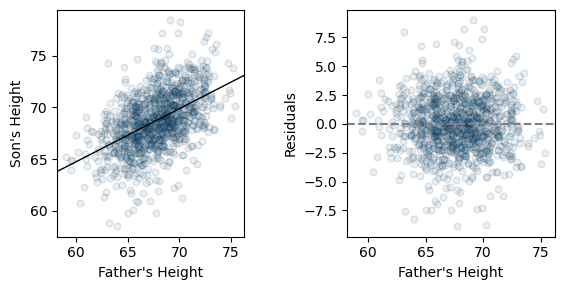

In [14]:
dad = df["Father's Height (inches)"]#.tail(-3)
son = df["Son's Height (inches)"]# .tail(-3)


fig, axs = plt.subplots(1, 2, 
                        figsize = (6,3),
                        sharex = True,
                        sharey = False) #1, 2, sharex = True, sharey = True, figsize = (6,2.8))

x, y = dad, son

for ax in axs:
    ax.set_aspect(1)
    ax.set_xlabel("Father's Height")

ax = axs[0]
ax.scatter(dad, son, alpha = .1, ec = 'black', s = 23)
ax.set_ylabel("Son's Height")

reg = linest(son,dad)
x = ax.get_xlim()
ax.plot(x, reg(x), color = 'black', lw = 1)
ax.set_xlim(x)

ax = axs[1]

ax.axhline(0, color = 'gray', ls = 'dashed')
ax.scatter(dad, reg.residuals, alpha = .1, ec = 'black', s = 23)
ax.set_ylabel('Residuals')
#plt.title("Regression to Mediocrity")
#plt.suptitle("The Regression Line Passes Through the Averages")
#axs[1].text(0.5, 1, s= "The Regression Line Passes Through the Averages",
#            transform = axs[1].transAxes,
#           ha = 'center',
#           va = 'bottom')
plt.tight_layout()
plt.savefig(f'../book/images/FatherSonResidual.svg', transparent = True)

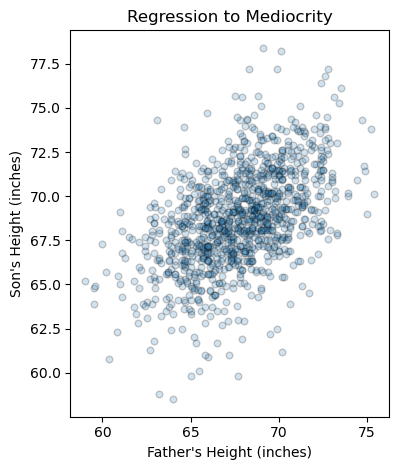

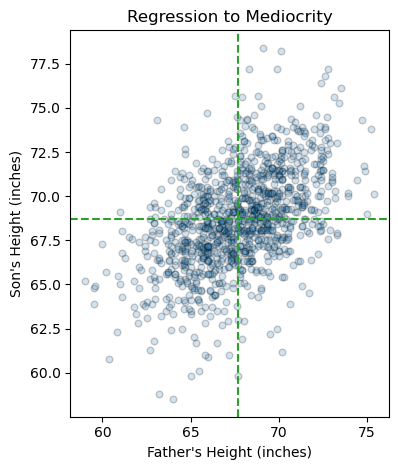

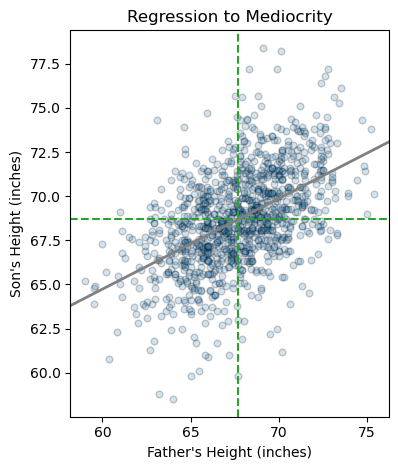

In [15]:
dad = df["Father's Height (inches)"]#.tail(-3)
son = df["Son's Height (inches)"]# .tail(-3)


for i in range(3):

    fig, ax = plt.subplots() #1, 2, sharex = True, sharey = True, figsize = (6,2.8))


    ax.set_aspect(1)
    
    if i > 0:
        ax.axvline(np.mean(dad), color = 'C2', ls = 'dashed')
        ax.axhline(np.mean(son), color = 'C2', ls = 'dashed')

    ax.scatter(dad, son, alpha = .2, ec = 'black', s = 23)

    ax.set_xlabel("Father's Height (inches)")
    ax.set_ylabel("Son's Height (inches)")

    if i > 1:
        reg = linest(son,dad)
        x = ax.get_xlim()
        plt.plot(x, reg(x), color = 'gray', lw = 2)
        ax.set_xlim(x)
        
    plt.title("Regression to Mediocrity")
    plt.tight_layout()
    plt.savefig(f'../book/images/singleFathersonscatter_{i}.svg', transparent = True)

# Bokeh

In [16]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, PointDrawTool

# Display plot within a notebook
output_notebook()

# Sample data
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 5, 8, 2, 7]}
data2 = {'x': [1.5, 2.5, 3.5], 'y': [2.5, 5.5, 7.5]}

# Create ColumnDataSource
source = ColumnDataSource(data)
source2 = ColumnDataSource(data2)

# Create a figure
p = figure(x_range=(0, 6), y_range=(0, 10), tools="")

# Add circle and rectangle glyphs
c1 = p.circle('x', 'y', source=source, size=20)
r1 = p.rect('x', 'y', width=0.1, height=0.1, source=source2)

# Add PointDrawTool to the figure
tool = PointDrawTool(renderers=[c1, r1])
p.add_tools(tool)
p.toolbar.active_tap = tool  # Activate the draw tool

# Show the plot
show(p)


Loading BokehJS ...

In [17]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, PointDrawTool, CustomJS, Div
from bokeh.layouts import column

# Display plot within a notebook
output_notebook()

# Sample data
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 5, 8, 2, 7]}

# Create ColumnDataSource
source = ColumnDataSource(data)

# Create a figure
p = figure(x_range=(0, 6), y_range=(0, 10), tools="")

# Add circle glyph
c1 = p.circle('x', 'y', source=source, size=20, color="navy", alpha=0.5)

# Display for correlation
div = Div(text="Correlation coefficient: ?", width=200, height=30)

# CustomJS for updating the correlation coefficient dynamically
callback = CustomJS(args=dict(source=source, div=div), code="""
    const data = source.data;
    const x = data['x'];
    const y = data['y'];
    const n = x.length;

    let mean_x = 0;
    let mean_y = 0;
    for (let i = 0; i < n; i++) {
        mean_x += x[i];
        mean_y += y[i];
    }
    mean_x /= n;
    mean_y /= n;

    let num = 0;
    let den_x = 0;
    let den_y = 0;
    for (let i = 0; i < n; i++) {
        num += (x[i] - mean_x) * (y[i] - mean_y);
        den_x += (x[i] - mean_x) ** 2;
        den_y += (y[i] - mean_y) ** 2;
    }

    const corr = num / Math.sqrt(den_x * den_y);
    div.text = "Correlation coefficient: " + corr.toFixed(2);
""")

# Add PointDrawTool to the figure
tool = PointDrawTool(renderers=[c1], add=False)
p.add_tools(tool)
p.toolbar.active_tap = tool  # Activate the draw tool

# Attach the callback to the source
source.js_on_change('data', callback)

# Show the plot and the correlation coefficient
show(column(div, p))


Loading BokehJS ...

# Basketball

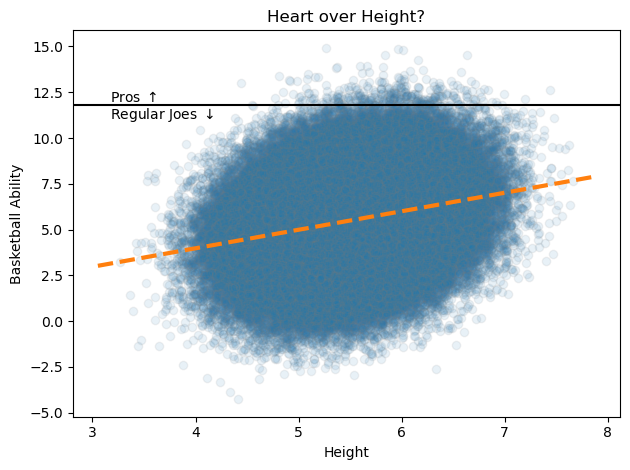

In [47]:
n = 300_000
height = np.random.normal(5.5, .5, size = n)
bball = height + np.random.normal(0, 2, size=n)

data = {"height": height,
       "basketball_ability": bball}
data = pd.DataFrame.from_dict(data)

data.sort_values('basketball_ability', ascending = False, inplace=True)

# find best 30*12
cutoff = data.iloc[360,1]

fig, ax = plt.subplots()
#ax.set_aspect(1)
ax.scatter(height, bball, alpha = .1, fc = 'C0', ec = 'gray')
ax.set_xlabel("Height")
ax.set_ylabel("Basketball Ability")
ax.axhline(cutoff, color = 'black')
ax.text(height.min() -.1, cutoff+.02,
       s = r'Pros $\uparrow$',
       va = 'bottom',
       ha = 'left')
ax.text(height.min() -.1, cutoff-.02,
       s = r'Regular Joes $\downarrow$',
       va = 'top',
       ha = 'left')

reg = linest(bball, height)

xlim = ax.get_xlim()
ax.plot(xlim, reg(xlim), ls = 'dashed', color = 'C1', lw = 3)

#data.head()
ax.set_title("Heart over Height?")

plt.tight_layout()
plt.savefig("../book/images/basketballHeight.svg", transparent = True)

In [27]:
nba = data.head(360)

linest(nba.basketball_ability, nba.height)

In [28]:
linest(data.basketball_ability, data.height)